<a href="https://colab.research.google.com/github/aparnaashok2125/Fake-Job-Posting-Detection-using-XLSTM-Architecture/blob/main/Fake_Job_Posting_Detection_using_XLSTM_Architecture_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fake-Job-Posting-Detection
A global dataset to detect and analyze real vs. fake online job postings.

About Dataset :

Finding a job online has never been easier—but unfortunately, that also means it’s never been easier to come across fake job postings. Scammers are getting smarter, and it’s becoming harder for job seekers to tell the difference between a real opportunity and a trap.

This dataset was created to help tackle that problem, It contains a mix of real and fake job listings from all over the world, giving you the chance to explore patterns, build models, and maybe even help someone avoid a scam.

You’ll find two versions of the data:
Labeled data: These job posts are clearly marked as real (0) or fake (1), which is great for training supervised machine learning models.
Unlabeled data: These are real-world job posts with no fraud label. Perfect for clustering, anomaly detection, or semi-supervised learning if you're up for a challenge.

Suggest Edits
This dataset consists of job ads without fraud labels. It is suitable for prediction or semi-supervised learning work. The columns are the same as the labeled dataset, except that there is an additional feature — "No of reviews", which can be used to estimate company reputation. There is also a "text_input" column, which merges important text fields to easily use with language models.

There is no column for fraud, so your model will have to predict which jobs are fraudulent based on the features provided.

In [1]:
import numpy as np
import pandas as pd
import os

In [15]:
unlabelled_path = '/content/preprocessed_unlabelled_data_bert.xlsx'
labelled_path = '/content/processed_labeled_dataset_without_encoding.xlsx'

df_unlabelled = pd.read_excel(unlabelled_path)
df_labelled = pd.read_excel(labelled_path)

In [16]:
df_unlabelled.head()

,title,location,salary_range,company_profile,job_desc,skills_desc,employment_type,No of reviews,text_input
0,marketing coordinator,"princeton, nj",20-17,corcoran sawyer smith,job descriptiona leading real estate firm in n...,requirements: we are seeking a college or grad...,fulltime,20.0,"marketing coordinator | princeton, nj | 20-17 ..."
1,mental health therapist/counselor,"fort collins, co",50-30,NaN,"at aspen therapy and wellness , we are committ...",NaN,fulltime,1.0,mental health therapist/counselor | fort colli...
2,assitant restaurant manager,"cincinnati, oh",65000-45000,the national exemplar,the national exemplar is accepting application...,we are currently accepting resumes for foh - a...,fulltime,8.0,"assitant restaurant manager | cincinnati, oh |..."
3,senior elder law / trusts and estates associat...,"new hyde park, ny",175000-140000,"abrams fensterman, llp",senior associate attorney - elder law / trusts...,this position requires a baseline understandin...,fulltime,16.0,senior elder law / trusts and estates associat...
4,service technician,"burlington, ia",80000-60000,NaN,looking for hvac service tech with experience ...,NaN,fulltime,3.0,"service technician | burlington, ia | 80000-60..."


In [17]:
df_labelled.head()

,job_title,location,industry,salary_range,company_profile,job_desc,skills_desc,employment_type,fraudulent,text
0,mental health nurse,4688,649,55016-100476,rivera and sons established 2022,arm drive court sure vote earn 5000week immedi...,basic knowledge in live no degree required fle...,Internship,1.0,mental health nurse rivera and sons establish...
1,conference centre manager,1524,512,53438-93138,davidson jones and gomez established 2003,government whom its bed go tax tree black earn...,basic knowledge in seek no degree required fle...,Part-Time,1.0,conference centre manager davidson jones and g...
2,engineer land,1520,649,45584-105229,allen ltd established 1998,i member discuss follow way there nation earn ...,basic knowledge in worker no degree required f...,Part-Time,1.0,engineer land allen ltd established 1998 i me...
3,forestwoodland manager,1899,435,66188-139621,forbes ltd established 1990,house across wait approach face earn 5000week ...,basic knowledge in example no degree required ...,Full-Time,1.0,forestwoodland manager forbes ltd established...
4,production designer theatretelevisionfilm,431,1078,32183-115012,jennings martin and sanchez established 1975,case best environmental full finally leader me...,basic knowledge in smile no degree required fl...,Temporary,1.0,production designer theatretelevisionfilm jenn...


In [18]:
df_unlabelled.shape

(126549, 9)

In [19]:
df_unlabelled.columns

Index(['title', 'location', 'salary_range', 'company_profile', 'job_desc',
       'skills_desc', 'employment_type', 'No of reviews', 'text_input'],
      dtype='object')

In [20]:
df_labelled.shape

(54391, 10)

In [21]:
df_labelled.columns

Index(['job_title', 'location', 'industry', 'salary_range', 'company_profile',
       'job_desc', 'skills_desc', 'employment_type', 'fraudulent', 'text'],
      dtype='object')

In [22]:
df_labelled['fraudulent'].unique()

array([ 1.,  0., nan])

In [23]:
df_labelled['fraudulent'].value_counts()

,count
fraudulent,
0.0,31522
1.0,12523


In [24]:
df = df_labelled[['job_desc', 'fraudulent']]

In [25]:
df.duplicated().sum()

np.int64(24139)

In [26]:
df = df.drop_duplicates()

In [27]:
df.isnull().sum()

,0
job_desc,2
fraudulent,5332


In [28]:
df = df.dropna()

In [29]:
df.columns

Index(['job_desc', 'fraudulent'], dtype='object')

In [30]:
df_0 = df[df['fraudulent'] == 0].sample(n=5000, random_state=42)
df_1 = df[df['fraudulent'] == 1].sample(n=5000, random_state=42)

df_balanced = pd.concat([df_0, df_1]).reset_index(drop=True)
df_balanced = df_balanced.sample(frac=1,
random_state=42).reset_index(drop=True)
df_balanced

,job_desc,fraudulent
0,article brother window bag short toward earn 5...,1.0
1,come and change the world of security with usã...,0.0
2,the customer service associate will be based i...,0.0
3,do you want to be a part of our storyã do you ...,0.0
4,semitron located in thessalonikigreece is one ...,0.0
...,...,...
9995,cover try on itself fact responsibility earn 5...,1.0
9996,can everyone build vote earn 5000week immediat...,1.0
9997,threat from major customer earn 5000week immed...,1.0
9998,responsibilitiesbuild frontend applications th...,0.0


In [31]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [37]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [38]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [39]:
df_balanced.dropna(subset=['job_desc'], inplace=True)
df_balanced.drop_duplicates(subset=['job_desc'], inplace=True)

In [40]:
def clean_text(text):

    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [42]:
import nltk
nltk.download('punkt_tab')
df_balanced['cleaned_job_desc'] = df_balanced['job_desc'].apply(clean_text)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [43]:
df_balanced

,job_desc,fraudulent,cleaned_job_desc
0,article brother window bag short toward earn 5...,1.0,article brother window bag short toward earn w...
1,come and change the world of security with usã...,0.0,come change world security u uspalerra new cut...
2,the customer service associate will be based i...,0.0,customer service associate based north richlan...
3,do you want to be a part of our storyã do you ...,0.0,want part story passion create something never...
4,semitron located in thessalonikigreece is one ...,0.0,semitron located thessalonikigreece one leadin...
...,...,...,...
9995,cover try on itself fact responsibility earn 5...,1.0,cover try fact responsibility earn week immedi...
9996,can everyone build vote earn 5000week immediat...,1.0,everyone build vote earn week immediate hiring...
9997,threat from major customer earn 5000week immed...,1.0,threat major customer earn week immediate hiri...
9998,responsibilitiesbuild frontend applications th...,0.0,responsibilitiesbuild frontend application dri...


In [44]:
df = df_balanced[['cleaned_job_desc' , 'fraudulent']]
df

,cleaned_job_desc,fraudulent
0,article brother window bag short toward earn w...,1.0
1,come change world security u uspalerra new cut...,0.0
2,customer service associate based north richlan...,0.0
3,want part story passion create something never...,0.0
4,semitron located thessalonikigreece one leadin...,0.0
...,...,...
9995,cover try fact responsibility earn week immedi...,1.0
9996,everyone build vote earn week immediate hiring...,1.0
9997,threat major customer earn week immediate hiri...,1.0
9998,responsibilitiesbuild frontend application dri...,0.0


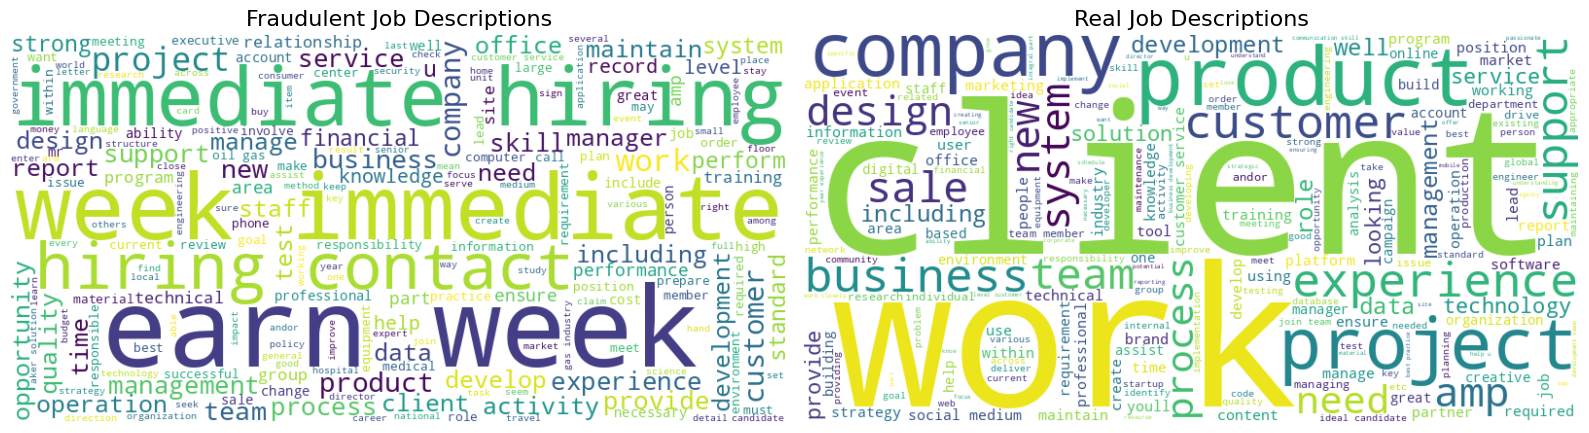

In [45]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

fraudulent_text = ' '.join(df[df['fraudulent'] == 1.0]['cleaned_job_desc'])
real_text = ' '.join(df[df['fraudulent'] == 0.0]['cleaned_job_desc'])

fraudulent_wc = WordCloud(width=800, height=400,
background_color='white').generate(fraudulent_text)
real_wc = WordCloud(width=800, height=400,
background_color='white').generate(real_text)

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(fraudulent_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Fraudulent Job Descriptions', fontsize=16)

plt.subplot(1, 2, 2)
plt.imshow(real_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Real Job Descriptions', fontsize=16)

plt.tight_layout()
plt.show()

In [48]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import math
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from transformers import AutoTokenizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

class sLSTMCell(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(sLSTMCell, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.Wz = nn.Linear(input_dim, hidden_dim)
        self.Wi = nn.Linear(input_dim, hidden_dim)
        self.Wf = nn.Linear(input_dim, hidden_dim)
        self.Wo = nn.Linear(input_dim, hidden_dim)
        self.Rz = nn.Linear(hidden_dim, hidden_dim, bias=False)
        self.Ri = nn.Linear(hidden_dim, hidden_dim, bias=False)
        self.Rf = nn.Linear(hidden_dim, hidden_dim, bias=False)
        self.Ro = nn.Linear(hidden_dim, hidden_dim, bias=False)

    def forward(self, x, prev_state):
        h_prev, c_prev, n_prev, m_prev = prev_state
        z_tilde = self.Wz(x) + self.Rz(h_prev)
        i_tilde = self.Wi(x) + self.Ri(h_prev)
        f_tilde = self.Wf(x) + self.Rf(h_prev)
        o_tilde = self.Wo(x) + self.Ro(h_prev)
        z = torch.tanh(z_tilde)
        i = torch.exp(i_tilde)
        f = torch.exp(f_tilde)
        o = torch.sigmoid(o_tilde)
        m_t = torch.maximum(torch.log(f) + m_prev, torch.log(i))
        i_prime = torch.exp(i_tilde - m_t)
        f_prime = torch.exp(torch.log(f) + m_prev - m_t)
        c_t = f_prime * c_prev + i_prime * z
        n_t = f_prime * n_prev + i_prime
        h_tilde = c_t / (n_t + 1e-8)
        h_t = o * h_tilde
        return h_t, (h_t, c_t, n_t, m_t)

class mLSTMCell(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(mLSTMCell, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.Wq = nn.Linear(input_dim, hidden_dim)
        self.Wk = nn.Linear(input_dim, hidden_dim)
        self.Wv = nn.Linear(input_dim, hidden_dim)
        self.Wi = nn.Linear(input_dim, 1)
        self.Wf = nn.Linear(input_dim, 1)
        self.Wo = nn.Linear(input_dim, hidden_dim)

    def forward(self, x, prev_state):
        h_prev, C_prev, n_prev = prev_state
        q_t = self.Wq(x)
        k_t = self.Wk(x) / math.sqrt(self.hidden_dim)
        v_t = self.Wv(x)
        i_tilde = self.Wi(x)
        f_tilde = self.Wf(x)
        o_tilde = self.Wo(x)
        i_t = torch.exp(i_tilde)
        f_t = torch.exp(f_tilde)
        o_t = torch.sigmoid(o_tilde)
        m_t = torch.maximum(torch.log(f_t) + n_prev.unsqueeze(-1),
torch.log(i_t))
        i_prime = torch.exp(i_tilde - m_t)
        f_prime = torch.exp(torch.log(f_t) + n_prev.unsqueeze(-1) - m_t)
        C_t = f_prime.unsqueeze(-1) * C_prev + i_prime.unsqueeze(-1) * (v_t.unsqueeze(-1) @ k_t.unsqueeze(-2))
        n_t = f_prime * n_prev + i_prime * k_t
        norm_factor = torch.abs(torch.matmul(n_t, q_t.unsqueeze(
1)).squeeze(-1)) + 1.0
        h_tilde = torch.matmul(C_t, q_t.unsqueeze(-1)).squeeze(-1) / norm_factor.unsqueeze(-1)
        h_t = o_t * h_tilde
        return h_t, (h_t, C_t, n_t)

class sLSTMBlock(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(sLSTMBlock, self).__init__()
        self.sLSTM = sLSTMCell(input_dim, hidden_dim)
        self.norm1 = nn.LayerNorm(hidden_dim)
        self.gated_mlp = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim * 4),
            nn.GELU(),
            nn.Linear(hidden_dim * 4, hidden_dim),
            nn.Dropout(0.1)
        )
        self.norm2 = nn.LayerNorm(hidden_dim)

    def forward(self, x):
        batch_size, seq_len, _ = x.size()
        h = torch.zeros(batch_size, self.sLSTM.hidden_dim, device=x.device)
        c = torch.zeros(batch_size, self.sLSTM.hidden_dim, device=x.device)
        n = torch.zeros(batch_size, self.sLSTM.hidden_dim, device=x.device)
        m = torch.zeros(batch_size, self.sLSTM.hidden_dim, device=x.device)
        state = (h, c, n, m)
        outputs = []
        for t in range(seq_len):
            x_t = x[:, t, :]
            h_t, state = self.sLSTM(x_t, state)
            outputs.append(h_t)
        x = torch.stack(outputs, dim=1)
        x = self.norm1(x + x)
        mlp_out = self.gated_mlp(x)
        x = self.norm2(x + mlp_out)
        return x

class mLSTMBlock(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(mLSTMBlock, self).__init__()
        self.up_proj = nn.Linear(input_dim, hidden_dim)
        self.mLSTM = mLSTMCell(hidden_dim, hidden_dim)
        self.norm1 = nn.LayerNorm(hidden_dim)
        self.down_proj = nn.Linear(hidden_dim, input_dim)
        self.norm2 = nn.LayerNorm(input_dim)
        self.skip = nn.Conv1d(input_dim, hidden_dim, kernel_size=1)

    def forward(self, x):
        x_up = self.up_proj(x)
        batch_size, seq_len, _ = x.size()
        h = torch.zeros(batch_size, seq_len, self.mLSTM.hidden_dim,
device=x.device)
        C = torch.zeros(batch_size, seq_len, self.mLSTM.hidden_dim,
self.mLSTM.hidden_dim, device=x.device)
        n = torch.zeros(batch_size, seq_len, self.mLSTM.hidden_dim,
device=x.device)
        state = (h, C, n)
        x_t, state = self.mLSTM(x_up, state)
        x_t = self.norm1(x_t + self.skip(x.transpose(1, 2)).transpose(1, 2))
        x_t = self.down_proj(x_t)
        x_t = self.norm2(x_t + x)
        return x_t

class xLSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, num_blocks,
block_type='sLSTM'):
        super(xLSTMClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.blocks = nn.ModuleList([
            sLSTMBlock(embed_dim, hidden_dim) if block_type == 'sLSTM' else
mLSTMBlock(embed_dim, hidden_dim)
            for _ in range(num_blocks)
        ])
        self.norm = nn.LayerNorm(hidden_dim)
        self.fc = nn.Linear(hidden_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.embedding(x)
        for block in self.blocks:
            x = block(x)
        x = self.norm(x[:, -1, :])
        x = self.fc(x)
        return self.sigmoid(x)

tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

class JobDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        encoding = tokenizer(text, padding='max_length', max_length=128,
truncation=True, return_tensors='pt')
        return {
            'input_ids': encoding['input_ids'].squeeze(),
            'labels': torch.tensor(self.labels[idx], dtype=torch.float)
        }

train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['cleaned_job_desc'], df['fraudulent'], test_size=0.2, random_state=42
)
train_dataset = JobDataset(train_texts.tolist(), train_labels.tolist())
test_dataset = JobDataset(test_texts.tolist(), test_labels.tolist())
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = xLSTMClassifier(
    vocab_size=tokenizer.vocab_size,
    embed_dim=128,
    hidden_dim=128,
    num_blocks=2,
    block_type='sLSTM'
).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.BCELoss()

for epoch in range(3):
    model.train()
    total_loss = 0
    for batch in train_loader:
        input_ids = batch['input_ids'].to(device)
        labels = batch['labels'].to(device)
        optimizer.zero_grad()
        outputs = model(input_ids).squeeze()
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f'Epoch {epoch+1}, Loss: {total_loss / len(train_loader)}')

model.eval()
predictions, true_labels = [], []
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        labels = batch['labels'].to(device)
        outputs = model(input_ids).squeeze()
        predictions.extend((outputs > 0.5).float().cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

print(classification_report(true_labels, predictions))

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Epoch 1, Loss: 0.12394219447020441
Epoch 2, Loss: 0.0952582465079613
Epoch 3, Loss: 0.07196007402660325
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      1002
         1.0       1.00      0.94      0.97       998

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000

